# Part 1

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

import time
import math

### Data (strings) and splitting

In [2]:
fname="DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter = ",",
                    usecols=(0,1), unpack=True, dtype=str)

N=len(sy)
print(N)

Ls=len(sx[0])
print(Ls)

print(sx[0],sy[0])

perc_train=0.8
N_train=int(N*perc_train)
N_test=N-N_train

print(f'\ndata: {N}\ntrain: {N_train}\ntest: {N_test}')

3000
16
AAGGTCTGCCGGCCGA 1

data: 3000
train: 2400
test: 600


In [3]:
#hot encoding to associate each character to a sequence of 0 and 1
Q = ["A","C","G","T"]
Nc=4
onehc={Q[i]:i for i in range(Nc)} #one hot encoding
print(onehc)

{'A': 0, 'C': 1, 'G': 2, 'T': 3}


### Data conversion

In [4]:
y = sy.astype(int)

L = Ls*Nc
print(L) #length of input layer

x = np.zeros((N,L)) #every row is an input
print(x[0])

for n in range(N): #for each sample
    for i in range(Ls): #for each character
        x[n][i*4 + onehc[sx[n][i]]] = 1
        
print(sx[0])
print(x[0])  
#hot encoding works (??????)

64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AAGGTCTGCCGGCCGA
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


### Split Train/Test-Validation

In [5]:
(x_train,y_train) = (x[:N_train],y[:N_train]) #TRAINING SET
(x_test,y_test)  = (x[N_train:],y[N_train:]) #TEST SET

print("Fraction of data=1 in the training:",y_train.sum()/N_train)
print("Fraction of data=1 in the test:",y_test.sum()/N_test)
#They are very similar

Fraction of data=1 in the training: 0.24333333333333335
Fraction of data=1 in the test: 0.25833333333333336


### Definition of model in keras

In [6]:
np.random.seed(123)

model = Sequential()

#I choose narrower dimensions of layers in my model (that's my choice)
#also activation is my choice
model.add(Dense(L,input_shape=(L,),activation="relu")) #set input layer of shape (1,0)
model.add(Dense(L/2,activation="relu"))
model.add(Dense(L/4,activation="relu"))
model.add(Dropout(0.2)) #drop non active nodes in the last layer(?)

#now I change the activation function because I want a prediciton as a probability of being 1
model.add(Dense(1,activation="sigmoid")) #OUTPUT


print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


### Optimization

In [7]:
opt1 = SGD(learning_rate=0.1,
          momentum=0.9,
          nesterov=True) 

model.compile(loss="binary_crossentropy", #check what it is
             optimizer=opt1, #"adam"
             metrics=['accuracy']) 


In [8]:
fit = model.fit(x_train, y_train, 
               epochs=30, batch_size=50,
               validation_data=(x_test,y_test),
                shuffle=True)

Epoch 1/30
48/48 [==============================] - 2s 31ms/step - loss: 0.5571 - accuracy: 0.7512 - val_loss: 0.5248 - val_accuracy: 0.7417
Epoch 2/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7582 - val_loss: 0.4963 - val_accuracy: 0.7417
Epoch 3/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.7928 - val_loss: 0.4742 - val_accuracy: 0.7600
Epoch 4/30
48/48 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8071 - val_loss: 0.4829 - val_accuracy: 0.7617
Epoch 5/30
48/48 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8652 - val_loss: 0.4925 - val_accuracy: 0.7483
Epoch 6/30
48/48 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8759 - val_loss: 0.5018 - val_accuracy: 0.7467
Epoch 7/30
48/48 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9055 - val_loss: 0.5310 - val_accuracy: 0.7767
Epoch 8/30
48/48 [=

19/19 [==============================] - 0s 1ms/step - loss: 1.3512 - accuracy: 0.8150

Test loss: 1.3512028455734253
Test accuracy: 0.8149999976158142


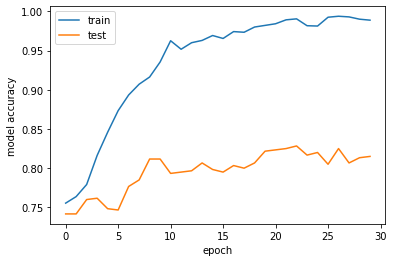

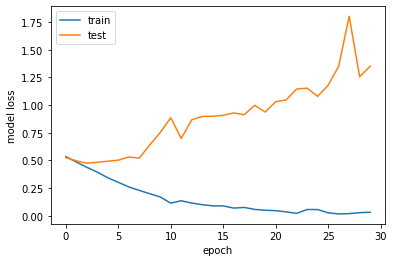

In [9]:
#Plot the results

score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Part 2

In [36]:
x_train_reshape = x_train.reshape(x_train.shape[0], int(x_train.shape[1]/4), 4)

new_x_train=[]
new_y_train=[]

for j in range(x_train_reshape.shape[0]):
    for i in range(x_train_reshape[j].shape[0]):
        new_x_train.append(np.concatenate((x_train_reshape[j][i:],x_train_reshape[j][:i])))
        new_y_train.append(y_train[j])

new_y_train = np.array(new_y_train)
new_x_train = np.array(new_x_train).reshape(x_train.shape[0]*16, x_train.shape[1])

In [37]:
fit_new = model.fit(new_x_train, new_y_train, 
                    epochs=30, batch_size=50,
                    validation_data=(x_test,y_test),
                    shuffle=True)

Epoch 1/30
768/768 [==============================] - 1s 1ms/step - loss: 0.4228 - accuracy: 0.8166 - val_loss: 0.3222 - val_accuracy: 0.8517
Epoch 2/30
768/768 [==============================] - 1s 1ms/step - loss: 0.3445 - accuracy: 0.8581 - val_loss: 0.2750 - val_accuracy: 0.8883
Epoch 3/30
768/768 [==============================] - 1s 1ms/step - loss: 0.3078 - accuracy: 0.8793 - val_loss: 0.2540 - val_accuracy: 0.9000
Epoch 4/30
768/768 [==============================] - 1s 1ms/step - loss: 0.2810 - accuracy: 0.8934 - val_loss: 0.2593 - val_accuracy: 0.9050
Epoch 5/30
768/768 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.9031 - val_loss: 0.2426 - val_accuracy: 0.9050
Epoch 6/30
768/768 [==============================] - 1s 1ms/step - loss: 0.2528 - accuracy: 0.9102 - val_loss: 0.2423 - val_accuracy: 0.9183
Epoch 7/30
768/768 [==============================] - 1s 979us/step - loss: 0.2386 - accuracy: 0.9147 - val_loss: 0.2040 - val_accuracy: 0.9267
Epoc

19/19 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9300

Test loss: 0.20533521473407745
Test accuracy: 0.9300000071525574


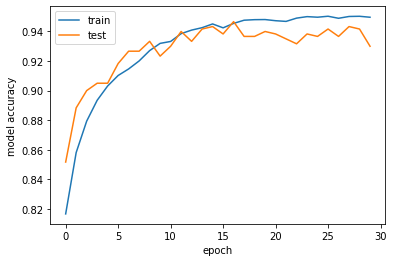

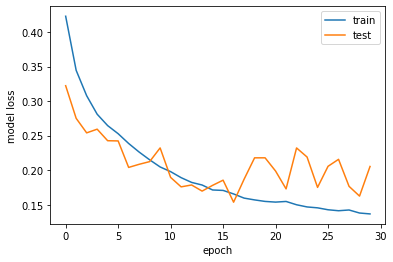

In [39]:
#Plot the results

score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history

# summarize history for accuracy
plt.plot(fit_new.history['accuracy'])
plt.plot(fit_new.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit_new.history['loss'])
plt.plot(fit_new.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
#DA SISTEMARE

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=1, 
                        batch_size=batch_size, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see compile_model()
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.bestscore, grid_result.bestparams))
means = grid_result.cvresults['mean_test_score']
stds = grid_result.cvresults['std_test_score']
params = grid_result.cvresults['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [52]:
#COSE

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = {"optimizer":optimizer,"activation":["relu","sigmoid","elu"]}
print(param_grid)

{'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 'activation': ['relu', 'sigmoid', 'elu']}
